In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import polyfit
from math import sqrt

In [2]:
# Generate data for principal component analysis
# In this specific example i have used a 2 dimensional data for the sake of clarity and eliminate
# complexity of generating eigen vectors for multi dimensional data

# This is representative sample and not entirely correct , but provides the intutive process of calculation
# that is not present while calculating Eigen value and vector using the Charcteristic equation

# Create 2 dimensional data for PCA

In [3]:
data = np.array([
        [3, 4],
        [2, 2],
        [6, 8],
        [1, 6],
        [8, 10],
        [3, 12],
        [9, 14],
        [6, 16],
    ], dtype='float64')

In [4]:
# Mean normalization is used here to shift the data towards origin of the 2 axis , 
# which will eliminate the need of intercept

# While generating a linear regression line with least sum of squared error , 
# which will eventually be our principal component 1

x_mean=np.mean(data.T[0])
y_mean=np.mean(data.T[1])

mean_norm_data =np.array([data.T[0]-x_mean,data.T[1]-y_mean]).T

print("X axis mean value : ",x_mean)
print("Y axis Mean value : ",y_mean)

X axis mean value :  4.75
Y axis Mean value :  9.0


In [5]:
mean_norm_data

array([[-1.75, -5.  ],
       [-2.75, -7.  ],
       [ 1.25, -1.  ],
       [-3.75, -3.  ],
       [ 3.25,  1.  ],
       [-1.75,  3.  ],
       [ 4.25,  5.  ],
       [ 1.25,  7.  ]])

In [6]:
# Feature scaling is also required if the 2 axes are inherently in different unit , we will be skipping 
# this step in the process

In [7]:
X_train=mean_norm_data.T[0].reshape(mean_norm_data.shape[0],1)
y_train=mean_norm_data.T[1]

# Compute the best fit line through data which will be PC1

In [8]:
# Fit a linear line on the data which will be the principal component 1

b, m = polyfit(mean_norm_data.T[0], mean_norm_data.T[1], 1)

print("Slope : ",m)
print("Intercept : ", b)

Slope :  1.10924369748
Intercept :  4.63045731175e-17


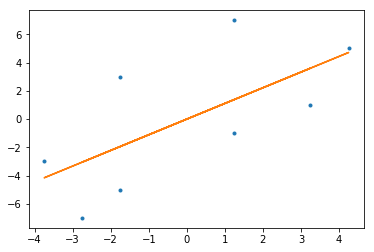

In [9]:
plt.plot(mean_norm_data.T[0], mean_norm_data.T[1], '.')
plt.plot(mean_norm_data.T[0], b + m * mean_norm_data.T[0], '-')
plt.show()

In [10]:
def line_intersection(line1, line2):
    xdiff = (line1[0][0] - line1[1][0], line2[0][0] - line2[1][0])
    ydiff = (line1[0][1] - line1[1][1], line2[0][1] - line2[1][1]) 
    
    def det(a, b):
        return a[0] * b[1] - a[1] * b[0]
    
    div = det(xdiff, ydiff)
    if div == 0:
        return None
    d = (det(*line1), det(*line2))
    x = det(d, xdiff) / div
    y = det(d, ydiff) / div
    return x, y

In [11]:
# Representing the PC1 line using 2 point format which will make finding orthogonal projection of points 
# on the line easier 

# Determine projection of orignal data on PC1

In [12]:
#Function to determine where the point lies with respect to new projected axes
def point_line_space(pc_line_ortho,row_val):
    v1 = [pc_line_ortho[1][0]-pc_line_ortho[0][0], pc_line_ortho[1][1]-pc_line_ortho[1][1]]  # Vector 1
    v2 = [pc_line_ortho[1][0]-row_val[0], pc_line_ortho[1][1]-row_val[1]]   # Vector 1
    xp = v1[0]*v2[1] - v1[1]*v2[0]  # Cross product
    if xp >= 0:
        return 1
    elif xp < 0:
        return 0

In [13]:
# Function to calculate the observation value projected on new / alternate axes

def pc_val(pc_m,pc_line,row_val):
    pc_ortho_m = -(1/pc_m)
    pc_ortho_b=row_val[1]-pc_ortho_m*row_val[0]
    pc_ortho_line=[tuple(row_val),(1,pc_ortho_m*1+pc_ortho_b)]
    ortho_proj=line_intersection(pc_line, pc_ortho_line)
    dist=sqrt( (ortho_proj[0] - 0)**2 + (ortho_proj[1] - 0)**2 )
    point_space=point_line_space([(1,1*pc_ortho_m),(0,0)],row_val)
    
    if point_space ==0:
        return dist
    else:
        return -dist

In [14]:
# For every row in data calculate the ortogonal projection and then calculate the distance between origin and the projection
# which will be the projection of point on newly created dimension "PC1"

pc1_line = [(1,m*1),(0,m*0)]

pc1=[]
for row in mean_norm_data:
    pc1.append(pc_val(m,pc1_line,row))

pc1

[4.8854475082985,
 7.040502383827814,
 0.09424848345983354,
 4.739151354868314,
 -2.9188895996888546,
 -1.0564270310199173,
 -6.559413110047772,
 -6.036123022778259]

# Compare PC1 by above process with PC1 derived from Scikit learn algorithm

In [15]:
# Let's Compare our PC1 with an alternative implementation using scikit on the same data

from sklearn import decomposition
pca = decomposition.PCA(n_components=1)
pca.fit(data)
X = pca.transform(data)

X

array([[ 5.26838171],
       [ 7.50389639],
       [ 0.37014574],
       [ 4.31448692],
       [-2.29257556],
       [-1.96485048],
       [-6.33639828],
       [-6.86308645]])